Customer Satisfaction prediction 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [8]:
df = pd.read_csv("C:\\Users\\VISHAL\\OneDrive\\Desktop\\DA Internship\\customer_Satisfaction.csv")

Removing unnecessary columns 

In [9]:
columns_to_drop = ['Ticket ID', 'Customer Name', 'Customer Email', 'Date of Purchase', 
                   'Ticket Description', 'Resolution']
df.drop(columns=columns_to_drop, inplace=True)


Handle Date time columns

In [10]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

df['Response Delay (min)'] = (df['First Response Time'] - df['First Response Time'].min()).dt.total_seconds() / 60
df['Resolution Time (min)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 60

df.drop(columns=['First Response Time', 'Time to Resolution'], inplace=True)


Removing rows without rating 

In [11]:
df.dropna(subset=['Customer Satisfaction Rating'], inplace=True)


Handle Negative Resolution Time

In [12]:
df['Resolution Time (min)'] = df['Resolution Time (min)'].apply(lambda x: max(x, 0))


Converting rating into three categories 

In [13]:
def categorize_satisfaction(rating):
    if rating <= 2:
        return 'Unsatisfied'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Satisfied'

df['Satisfaction Category'] = df['Customer Satisfaction Rating'].apply(categorize_satisfaction)


Encode Categorical Features

In [14]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 
                    'Ticket Status', 'Ticket Priority', 'Ticket Channel']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


Define Features and Target

In [15]:
X = df.drop(columns=['Customer Satisfaction Rating', 'Satisfaction Category'])
y = df['Satisfaction Category']


Spit dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Model

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

     Neutral       0.27      0.07      0.11       112
   Satisfied       0.40      0.50      0.44       216
 Unsatisfied       0.39      0.44      0.41       226

    accuracy                           0.39       554
   macro avg       0.35      0.33      0.32       554
weighted avg       0.37      0.39      0.36       554

[[  8  45  59]
 [ 10 107  99]
 [ 12 115  99]]


Distribution of Satisfaction Categories

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_21288\10838970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Satisfaction Category', palette='viridis')


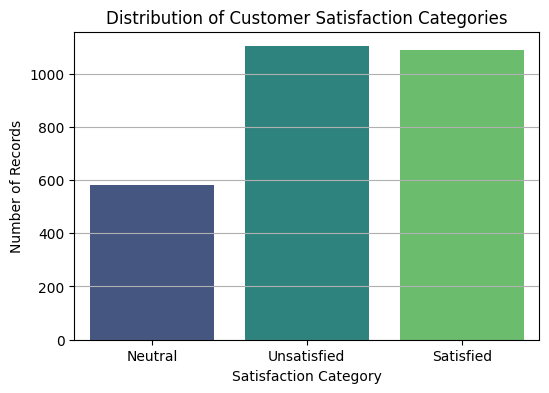

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Satisfaction Category', palette='viridis')
plt.title('Distribution of Customer Satisfaction Categories')
plt.ylabel('Number of Records')
plt.grid(axis='y')
plt.savefig("satisfaction_distribution.png")


Age vs Satisfaction

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_21288\4077936816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Satisfaction Category', y='Customer Age', palette='coolwarm')


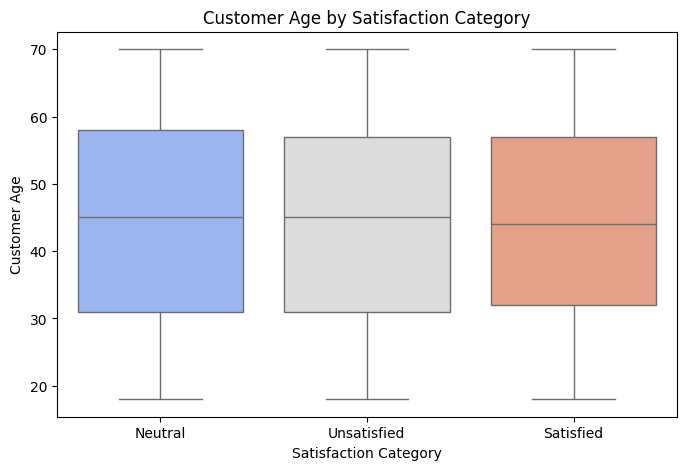

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Satisfaction Category', y='Customer Age', palette='coolwarm')
plt.title('Customer Age by Satisfaction Category')
plt.savefig("age_vs_satisfaction.png")

Ticket Priority vs Satisfaction

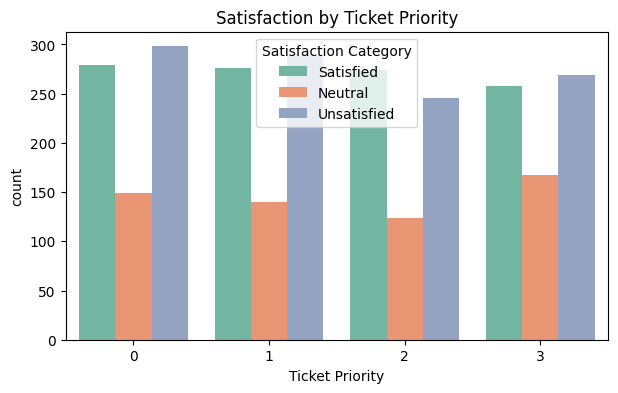

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Ticket Priority', hue='Satisfaction Category', palette='Set2')
plt.title('Satisfaction by Ticket Priority')
plt.savefig("priority_vs_satisfaction.png")

Ticket Channel vs Satisfaction

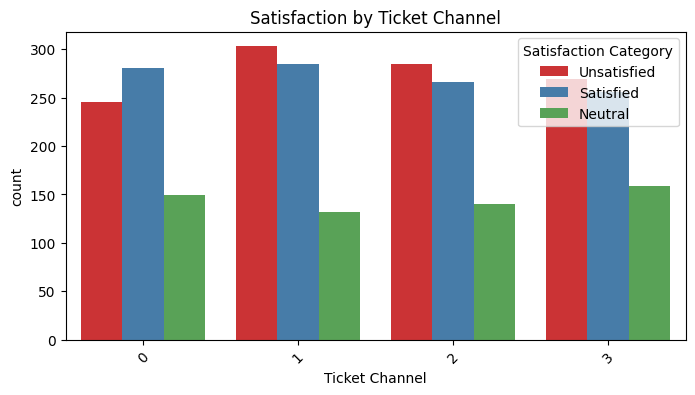

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Ticket Channel', hue='Satisfaction Category', palette='Set1')
plt.title('Satisfaction by Ticket Channel')
plt.xticks(rotation=45)
plt.savefig("channel_vs_satisfaction.png")

Resolution Time vs Satisfaction

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_21288\2955576326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Satisfaction Category', y='Resolution Time (min)', palette='pastel')


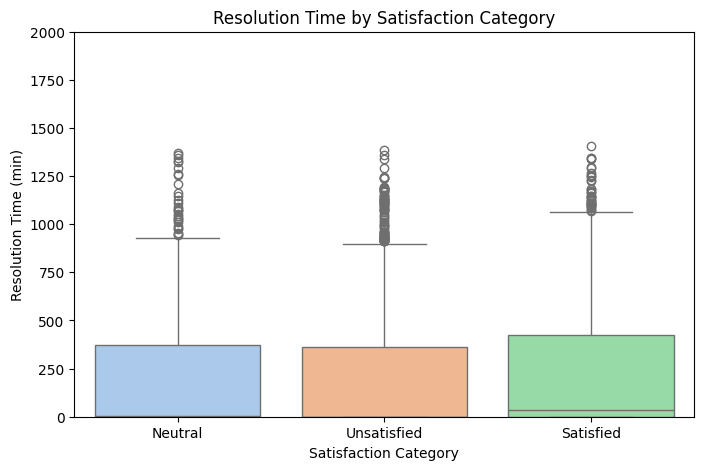

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Satisfaction Category', y='Resolution Time (min)', palette='pastel')
plt.ylim(0, 2000)
plt.title('Resolution Time by Satisfaction Category')
plt.savefig("resolution_time_vs_satisfaction.png")